In [1]:
from high_level_tdc import *
from time import sleep
from matplotlib import pyplot as plt
import numpy as np

/home/pi/kilom_spi/high_level_tdc.py:14: RuntimeWarning: This channel is already in use, continuing anyway.  Use GPIO.setwarnings(False) to disable warnings.
  GPIO.setup(2, GPIO.OUT)


In [ ]:
#todo
# something is shifty with the interrupt

In [7]:
for i in range(0,3):
  acquire(trig_chan=0, channels = [0,1])

ch 0, t1 =      0.00 ns, tot =     -1.00 ns
ch 1, t1 =      3.75 ns, tot =     -1.00 ns
ch 0, t1 =      0.00 ns, tot =     -1.00 ns
ch 1, t1 =      3.75 ns, tot =     -1.00 ns
ch 0, t1 =      0.00 ns, tot =     -1.00 ns
ch 1, t1 =      3.75 ns, tot =     -1.00 ns


In [18]:
clear_hw_trig()
#trigger_on_chan(0)
#trigger_on_chan(4)
bin(get_hw_trig_map())

'0b0'

In [20]:
disable_calib_pulser()
#enable_calib_pulser()

print(read_scaler(0))
for i in range(0,2):
  print(scaler_rate(i,delay=0.1))

[2827, 95905]
2061.917508303904
2069.895803634558


In [24]:
wait_for_trig(timeout=2)
get_trig_state()

0

ta pre  (ns) 96216225.000
tb pre  (ns) 96216228.750
ta post (ns) 96700484.583
tb post (ns) 96700488.333

ta pre  (ns) 98151359.583
tb pre  (ns) 98151363.333
ta post (ns) 98634416.250
tb post (ns) 98634420.000

ta pre  (ns) 104439712.500
tb pre  (ns) 104439716.250
ta post (ns) 104923458.750
tb post (ns) 104923462.500

ta pre  (ns) 110242424.583
tb pre  (ns) 110242428.333
ta post (ns) 110725888.750
tb post (ns) 110725892.500

ta pre  (ns) 3713997.500
tb pre  (ns) 3714001.667
ta post (ns) 4197627.917
tb post (ns) 4197631.667



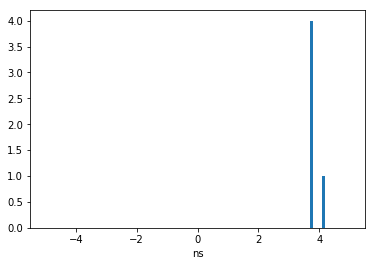

In [30]:

tdiff =  []

disable_calib_pulser()
#enable_calib_pulser()

# triggering pulse is stored in post register

a = 0
b = 1

trigger_on_chan(0)


for i in range(0,5):
  arm()
  wait_for_trig()
  tapre = read_pre_t1(a)
  tbpre = read_pre_t1(b)
  tapost = read_t1(a)
  tbpost = read_t1(b)
  print("ta pre  (ns) {:3.3f}".format(tapre*1e9))
  print("tb pre  (ns) {:3.3f}".format(tbpre*1e9))
  print("ta post (ns) {:3.3f}".format(tapost*1e9))
  print("tb post (ns) {:3.3f}".format(tbpost*1e9))
  print()

  tdiff += [tbpre-tapre]

tdiff = np.array(tdiff)

plt.hist(tdiff*1e9,bins=np.linspace(-5,5,100))
plt.xlabel("ns")
plt.show()